In [9]:
import os
import sys

print (os.getcwd())

/Users/quockhoile/Desktop/DaiHoc/AIC/OCR/Vietnamese-OCR-with-Correction/filter


In [153]:
import cv2
import os
path = '/Users/quockhoile/Desktop/DaiHoc/AIC/OCR/Vietnamese-OCR-with-Correction/image_test/062.jpg'
img1 = cv2.imread('/Users/quockhoile/Desktop/DaiHoc/AIC/OCR/Vietnamese-OCR-with-Correction/image_test/062.jpg')
img2 = cv2.imread('/Users/quockhoile/Desktop/DaiHoc/AIC/OCR/Vietnamese-OCR-with-Correction/image_test/094.jpg')

In [154]:
import cv2
import numpy as np

def compare_region_color(img1, img2, box):
    x, y, w, h = box
    region1 = cv2.cvtColor(img1[y:y+h, x:x+w], cv2.COLOR_BGR2HSV)
    region2 = cv2.cvtColor(img2[y:y+h, x:x+w], cv2.COLOR_BGR2HSV)

    # Chỉ lấy 2 kênh H và S
    hist1 = cv2.calcHist([region1], [0, 1], None, [50, 60], [0, 180, 0, 256])
    hist2 = cv2.calcHist([region2], [0, 1], None, [50, 60], [0, 180, 0, 256])

    # Chuẩn hóa để loại bỏ ảnh hưởng kích thước vùng
    cv2.normalize(hist1, hist1)
    cv2.normalize(hist2, hist2)

    # So sánh histogram bằng tương quan (CORREL)
    score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return score

# # x=0, y=647, w=1280, h=15

# Che danh sách chữ bị trùng 
score = compare_region_color(img1, img2, (0, 660, 1280, 20))
print("Color Histogram Similarity Score:", score)



Color Histogram Similarity Score: 0.5910553507015209


In [155]:
import glob

folder_path = "/Users/quockhoile/Desktop/DaiHoc/AIC/OCR/Vietnamese-OCR-with-Correction/L13/L13_V001"
image_paths = glob.glob(os.path.join(folder_path, "*.jpg"))
box = (0, 660, 1280, 20)  # Vùng cần so sánh (x, y, w, h)

# === So sánh từng ảnh và in kết quả ===
log_path = os.path.join(folder_path, "log.txt")

with open(log_path, "w", encoding="utf-8") as f:
    for img_path in image_paths:
        img2 = cv2.imread(img_path)
        score = compare_region_color(img1, img2, box)
        msg = f"{os.path.basename(img_path)}  →  Score: {score:.4f}"
        print(msg)       # In ra console
        f.write(msg + "\n")  # Ghi vào file log

print(f"\n✅ Kết quả đã lưu vào: {log_path}")


823.jpg  →  Score: 0.6854
604.jpg  →  Score: 0.6965
176.jpg  →  Score: 0.8479
610.jpg  →  Score: 0.1883
406.jpg  →  Score: 0.9063
412.jpg  →  Score: 0.7929
599.jpg  →  Score: -0.0193
214.jpg  →  Score: 0.8065
566.jpg  →  Score: 0.7612
200.jpg  →  Score: 0.6451
943.jpg  →  Score: 0.2810
758.jpg  →  Score: 0.6525
770.jpg  →  Score: 0.8008
016.jpg  →  Score: 0.4550
002.jpg  →  Score: 0.0437
764.jpg  →  Score: 0.8128
003.jpg  →  Score: 0.0054
017.jpg  →  Score: 0.4147
215.jpg  →  Score: 0.7957
229.jpg  →  Score: 0.9295
598.jpg  →  Score: 0.6904
361.jpg  →  Score: 0.7499
407.jpg  →  Score: 0.9438
349.jpg  →  Score: 0.7804
611.jpg  →  Score: -0.0105
605.jpg  →  Score: 0.7301
163.jpg  →  Score: 0.4310
188.jpg  →  Score: 0.8038
836.jpg  →  Score: 0.6534
820.jpg  →  Score: 0.8102
808.jpg  →  Score: 0.8583
149.jpg  →  Score: 0.7884
613.jpg  →  Score: 0.0760
175.jpg  →  Score: 0.8126
607.jpg  →  Score: 0.1524
388.jpg  →  Score: 0.6385
439.jpg  →  Score: 0.2246
559.jpg  →  Score: 0.6074
203.jpg  →

In [128]:
# import cv2
# import numpy as np

# def compare_hist_region(img1, img2, x, y, w, h, method='correlation'):
#     """
#     So sánh độ tương đồng histogram của hai vùng (x, y, w, h) trên hai ảnh.

#     Tham số:
#         img1, img2 : ảnh cần so sánh (định dạng OpenCV BGR)
#         x, y, w, h : toạ độ vùng cần so sánh
#         method : phương pháp so sánh histogram
#                  ('correlation', 'chi-square', 'intersection', 'bhattacharyya')

#     Trả về:
#         score : điểm tương đồng (float)
#     """

#     # Cắt vùng tương ứng trên mỗi ảnh
#     region1 = img1[y:y+h, x:x+w]
#     region2 = img2[y:y+h, x:x+w]

#     # Chuyển sang không gian HSV (so sánh màu ổn định hơn RGB)
#     hsv1 = cv2.cvtColor(region1, cv2.COLOR_BGR2HSV)
#     hsv2 = cv2.cvtColor(region2, cv2.COLOR_BGR2HSV)

#     # Tính histogram 3 kênh (H, S, V)
#     hist1 = cv2.calcHist([hsv1], [0, 1], None, [50, 60], [0, 180, 0, 256])
#     hist2 = cv2.calcHist([hsv2], [0, 1], None, [50, 60], [0, 180, 0, 256])

#     # Chuẩn hóa histogram
#     cv2.normalize(hist1, hist1)
#     cv2.normalize(hist2, hist2)

#     # Chọn phương pháp so sánh
#     methods = {
#         'correlation': cv2.HISTCMP_CORREL,         # 1 = giống hệt
#         'chi-square': cv2.HISTCMP_CHISQR,          # 0 = giống hệt
#         'intersection': cv2.HISTCMP_INTERSECT,     # lớn hơn = giống hơn
#         'bhattacharyya': cv2.HISTCMP_BHATTACHARYYA # 0 = giống hệt
#     }

#     if method not in methods:
#         raise ValueError(f"Phương pháp không hợp lệ. Hãy chọn một trong {list(methods.keys())}")

#     score = cv2.compareHist(hist1, hist2, methods[method])
#     return float(score)


# # x=0, y=647, w=1280, h=15

# score_hist = compare_hist_region(img1, img2, 0, 648, 1280, 15, method='correlation')
# print("Histogram Similarity Score:", score_hist)


Histogram Similarity Score: 0.2707183219611758


In [95]:
import cv2
from skimage.metrics import structural_similarity as ssim


def compare_region_ssim(img1, img2, box):
    x, y, x1, y1 = box
    region1 = cv2.cvtColor(img1[y:y1, x:x1], cv2.COLOR_BGR2GRAY)
    region2 = cv2.cvtColor(img2[y:y1, x:x1], cv2.COLOR_BGR2GRAY)
    
    score, _ = ssim(region1, region2, full=True)
    return score

box = (0, 645, 1280, 691)

score_ssim = compare_region_ssim(img1, img2, box)
print("SSIM Score:", score_ssim)

SSIM Score: 0.32674277469466345


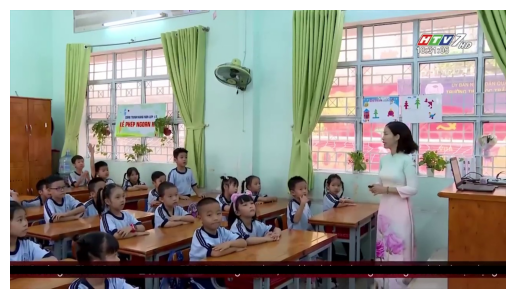

In [144]:
import cv2
import os
from matplotlib import pyplot as plt

path = '/Users/quockhoile/Desktop/DaiHoc/AIC/OCR/Vietnamese-OCR-with-Correction/image_test/076.jpg'

def redact_box(image_path, x, y, w, h, color=(0, 0, 0)):
    """
    Che vùng trên ảnh bằng hình chữ nhật màu (mặc định: đen)
    
    Args:
        image_path (str): đường dẫn ảnh
        x, y (int): tọa độ góc trên bên trái
        w, h (int): chiều rộng, chiều cao box
        color (tuple): màu RGB, mặc định (0,0,0)
    
    Returns:
        img (numpy.ndarray): ảnh đã che
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Không thể đọc ảnh. Kiểm tra đường dẫn!")

    cv2.rectangle(img, (x, y), (x + w, y + h), color, -1)
    return img

# 🧠 Ví dụ sử dụng:
result = redact_box(path, x=0, y=660, w=1280, h=20)
# Chuyển sang RGB để hiển thị đúng màu
img_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Hiển thị bằng matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # ẩn trục
plt.show()